<a href="https://colab.research.google.com/github/hucarlos08/Geo-ML-AT/blob/main/BayesianStatistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## Frequentist vs Bayesian: A Comparative Illustration

Understanding the difference between Bayesian and Frequentist statistics is fundamental for anyone delving into the field of machine learning or data science. Below, we'll explore some key distinctions between the two approaches.

#### Key Differences

1. **Interpretation of Probability**  
   - **Frequentist**: Probability is the long-term frequency of events.
   - **Bayesian**: Probability represents a degree of belief or confidence.
  
2. **Role of Parameters and Data**  
   - **Frequentist**: Parameters ($ \theta $) are fixed but unknown, and data ($ D $) varies.
   - **Bayesian**: Parameters ($ \theta $) are unknown and treated as random variables, and data ($ D $) is fixed.
  
3. **Incorporation of Prior Knowledge**  
   - **Frequentist**: Prior beliefs or knowledge are not formally incorporated into the model.
   - **Bayesian**: Prior beliefs or knowledge can be formally integrated into the model as a prior distribution.
  
4. **Uncertainty Handling**  
   - **Frequentist**: Confidence intervals are used to express uncertainty.
   - **Bayesian**: Probability distributions (posterior distributions) are used to express uncertainty.

## Bayesian stadistics

###Illustrative Example: Estimating the Probability of a Coin Coming up Heads

#### Problem Statement

Let  $\theta $ be the chance that some coin comes up heads, an event we denote by $ Y = 1 $. We toss a coin $ N $ times, and we record the outcomes as $ D = \{ y_n \in \{0, 1\} : n = 1, 2, \ldots, N \} $. Our goal is to compute $ p(\theta | D) $, the probability distribution of $ \theta $ given the data $ D $.

In the Bayesian approach, we start with a prior distribution $ p(\theta) $ that represents our initial belief about $ \theta $. A common choice for the prior in coin toss problems is the Beta distribution, which is the conjugate prior for the Bernoulli distribution. As we collect data $ D $, we update this prior to compute the posterior distribution $ p(\theta | D) $ using Bayes' theorem:

$$
p(\theta | D) = \frac{p(D | \theta) \times p(\theta)}{p(D)}
$$

Here:
- $ p(D | \theta) $ is the likelihood, which tells us how likely the data $ D $ is given $ \theta $.
- $ p(\theta) $ is the prior, which is our initial belief about $ \theta $.
- $ p(D) $ is the marginal likelihood, often computed by integrating over all possible values of $ \theta $:

$$
p(D) = \int p(D | \theta) \times p(\theta) \, d\theta
$$

The result is a posterior distribution $ p(\theta | D) $ that represents our updated belief about $ \theta $ after observing the data $ D $.

### Likelihood Function $ p(D | \theta) $

The likelihood function represents the probability of observing the given data $ D $ under different settings of the parameter $ \theta $. For a coin-toss experiment, each toss is a Bernoulli trial, which means that it can result in either a "head" ($ Y = 1 $) or a "tail" ($ Y = 0 $).

The likelihood function for $ N $ independent coin tosses is given by:

$$
p(D | \theta) = \theta^{N_1} \times (1 - \theta)^{N_0}
$$

where $ \theta $ is the probability of getting a head, $ N_1 $ is the number of heads observed, and $ N $ is the total number of coin tosses.

#### Interpretation

- When $ N_1 $ is large (many heads observed), the likelihood function will be maximized for values of $ \theta $ close to 1.
- When $ N_1 $ is small (few heads observed), the likelihood function will be maximized for values of $ \theta $ close to 0.
- When $ N_1 $ is around $ \frac{N}{2} $, the likelihood function will be maximized for values of $ \theta $ close to 0.5.


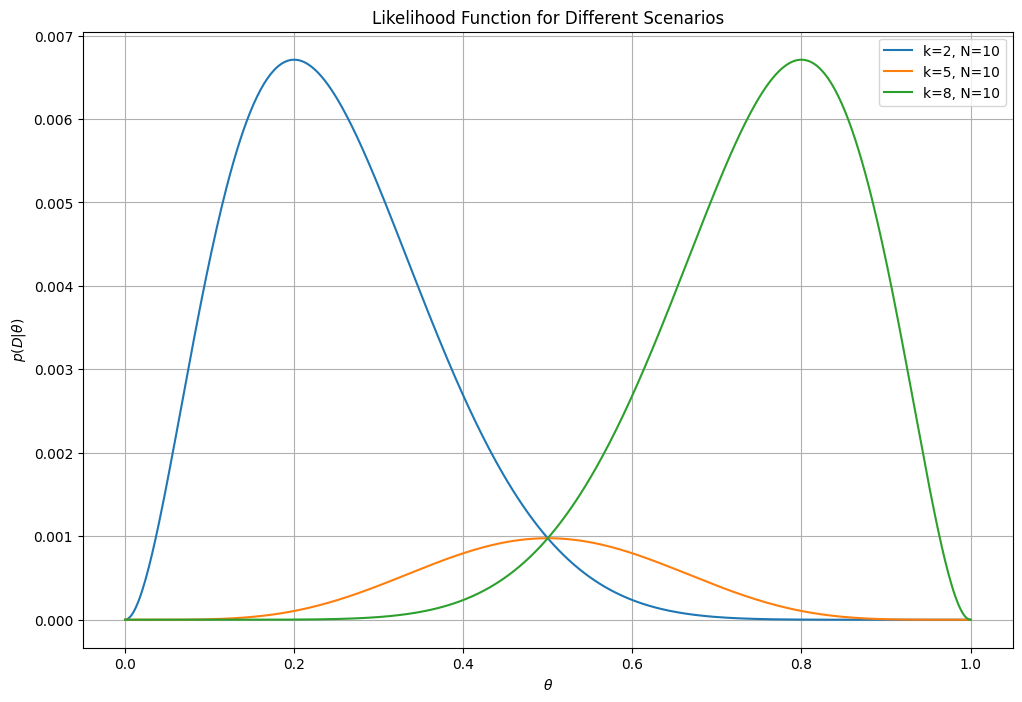

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate the likelihood
def likelihood(theta, k, N):
    return (theta ** k) * ((1 - theta) ** (N - k))

# Different scenarios with varying k and N values
scenarios = [
    {'k': 2, 'N': 10},
    {'k': 5, 'N': 10},
    {'k': 8, 'N': 10}
]

# Values for theta (from 0 to 1)
theta_values = np.linspace(0, 1, 500)

# Plotting the likelihood function for different scenarios
plt.figure(figsize=(12, 8))

for scenario in scenarios:
    k, N = scenario['k'], scenario['N']
    plt.plot(theta_values, likelihood(theta_values, k, N), label=f"k={k}, N={N}")

plt.title("Likelihood Function for Different Scenarios")
plt.xlabel("$\\theta$")
plt.ylabel("$p(D | \\theta)$")
plt.legend()
plt.grid(True)
plt.show()


### The Prior Distribution $ p(\theta) $

#### Uninformative Prior

When we know nothing about the parameter $ \theta $, except that it lies in the interval $[0, 1]$, we can use what is known as an "uninformative prior." A common choice for this is the uniform distribution:

$$
p(\theta) = \text{Unif}(\theta|0, 1)
$$

This implies that all values of $ \theta $ in the interval $[0, 1]$ are equally likely. The density function for this uniform distribution is 1 for $ \theta $ in $[0, 1]$ and 0 otherwise.

#### Beta Distribution as a General Prior

More generally, we can specify the prior using a Beta distribution for reasons that will become clear shortly. The Beta distribution is defined by two parameters, $ \alpha $ and $ \beta $, and is given by:

$$
p(\theta) = \text{Beta}(\theta|\alpha, \beta) = \frac{\theta^{\alpha-1}(1-\theta)^{\beta-1}}{B(\alpha, \beta)}
$$

Here, $ B(\alpha, \beta) $ is the Beta function, defined as:

$$
B(\alpha, \beta) = \int_0^1 t^{\alpha-1} (1-t)^{\beta-1} dt
$$

The Beta distribution is a flexible distribution that can take on various shapes depending on the values of $ \alpha $ and $ \beta $. Importantly, the Beta distribution is a "conjugate prior" for the Bernoulli likelihood function, which makes the mathematical computation of the posterior distribution much easier.

#### Why Use a Beta Distribution?

The Beta distribution is often used as a prior in Bernoulli and Binomial experiments for several reasons:

1. **Conjugacy**: As mentioned earlier, it is a conjugate prior for the Bernoulli distribution, making it mathematically convenient.
2. **Flexibility**: By adjusting $ \alpha $ and $ \beta $, we can model various states of prior belief.
3. **Interpretability**: The parameters $ \alpha $ and $ \beta $ can be intuitively understood as "pseudo-counts" of successes and failures, respectively.

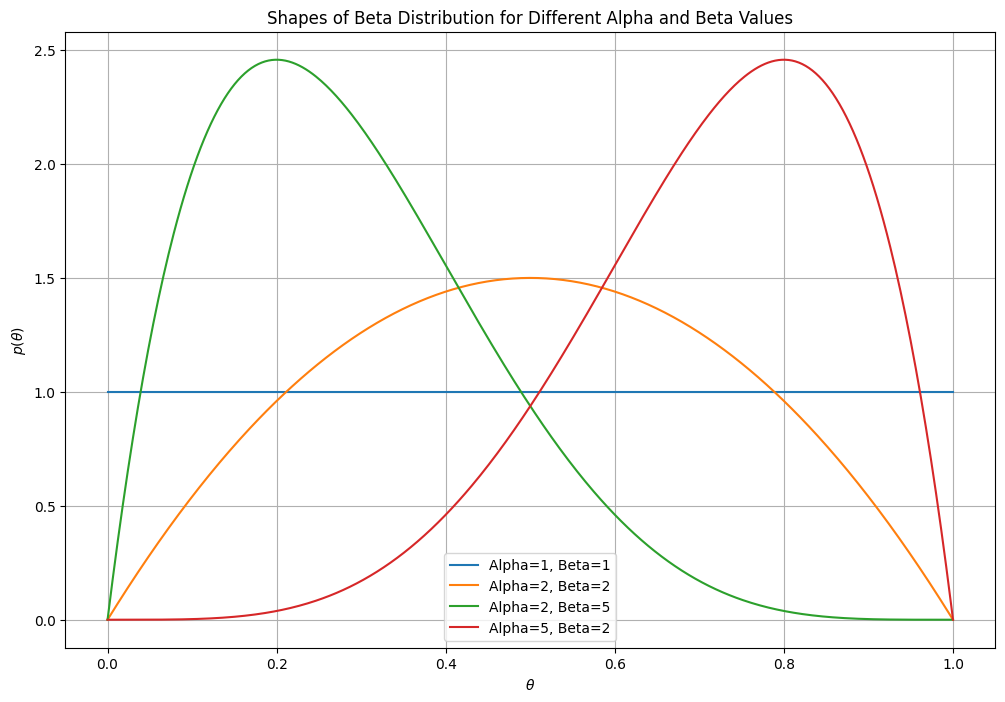

In [ ]:
from scipy.stats import beta

# Different alpha and beta parameters
params = [
    {'alpha': 1, 'beta': 1},  # Uniform distribution
    {'alpha': 2, 'beta': 2},  # Symmetric, peak at 0.5
    {'alpha': 2, 'beta': 5},  # Skewed towards 0
    {'alpha': 5, 'beta': 2}   # Skewed towards 1
]

# Generate theta values
theta_values = np.linspace(0, 1, 500)

# Plotting the Beta distributions
plt.figure(figsize=(12, 8))

for param in params:
    alpha, beta_ = param['alpha'], param['beta']
    plt.plot(theta_values, beta.pdf(theta_values, alpha, beta_), label=f"Alpha={alpha}, Beta={beta_}")

plt.title("Shapes of Beta Distribution for Different Alpha and Beta Values")
plt.xlabel("$\\theta$")
plt.ylabel("$p(\\theta)$")
plt.legend()
plt.grid(True)
plt.show()


#### Understanding the Beta Distribution: A Graphical Perspective

The graph above shows how the shape of the Beta distribution changes with different values of $\alpha$ and $\beta$.

- **$\alpha=1$, $\beta=1$**: This represents a Uniform distribution, indicating that we have no prior belief favoring any particular value of $\theta$. In other words, all values between 0 and 1 are equally likely. This is often used as an "uninformative prior" when we have little or no information about the parameter.

- **$\alpha=2$, $\beta=2$**: The distribution is symmetric and peaks at $\theta = 0.5$. This could represent a prior belief that the coin is likely fair, but we're not entirely sure.

- **$\alpha=2$, $\beta=5$**: The distribution skews towards 0, suggesting a prior belief that "tails" are more likely than "heads." This might be appropriate if, for example, we have some prior experiments or information suggesting that tails are more frequent.

- **$\alpha=5$, $\beta=2$**: Conversely, this distribution skews towards 1, implying a prior belief that "heads" are more likely than "tails."

The flexibility of the Beta distribution makes it a powerful choice for a prior in Bernoulli and Binomial experiments. By adjusting $\alpha$ and $\beta$, we can model a wide range of prior beliefs.

### The Posterior Distribution $p(\theta | D)$

In Bayesian statistics, when the prior distribution is a "conjugate prior" to the likelihood function, the posterior distribution will belong to the same family of distributions as the prior. For Bernoulli likelihood and Beta prior, the Beta distribution is a conjugate prior. This is highly convenient as it simplifies the mathematical computation of the posterior distribution.

The posterior distribution $p(\theta | D)$ can be calculated using Bayes' theorem as follows:

$$
p(\theta | D) = \frac{p(D | \theta) \times p(\theta)}{p(D)}
$$

Given a Bernoulli likelihood $p(D | \theta) = \theta^{N_1} \times (1 - \theta)^{(N_0)}$ and a Beta prior $p(\theta) = \frac{\theta^{\alpha-1}(1-\theta)^{\beta-1}}{B(\alpha, \beta)}$, the posterior distribution is also a Beta distribution:

$$
p(\theta | D) = \text{Beta}(\theta | \alpha + N_1, \beta + N_0)
$$

Here, $\alpha + N_1$ and $\beta + N_0$ are the updated parameters of the Beta distribution, incorporating both the prior information and the observed data.

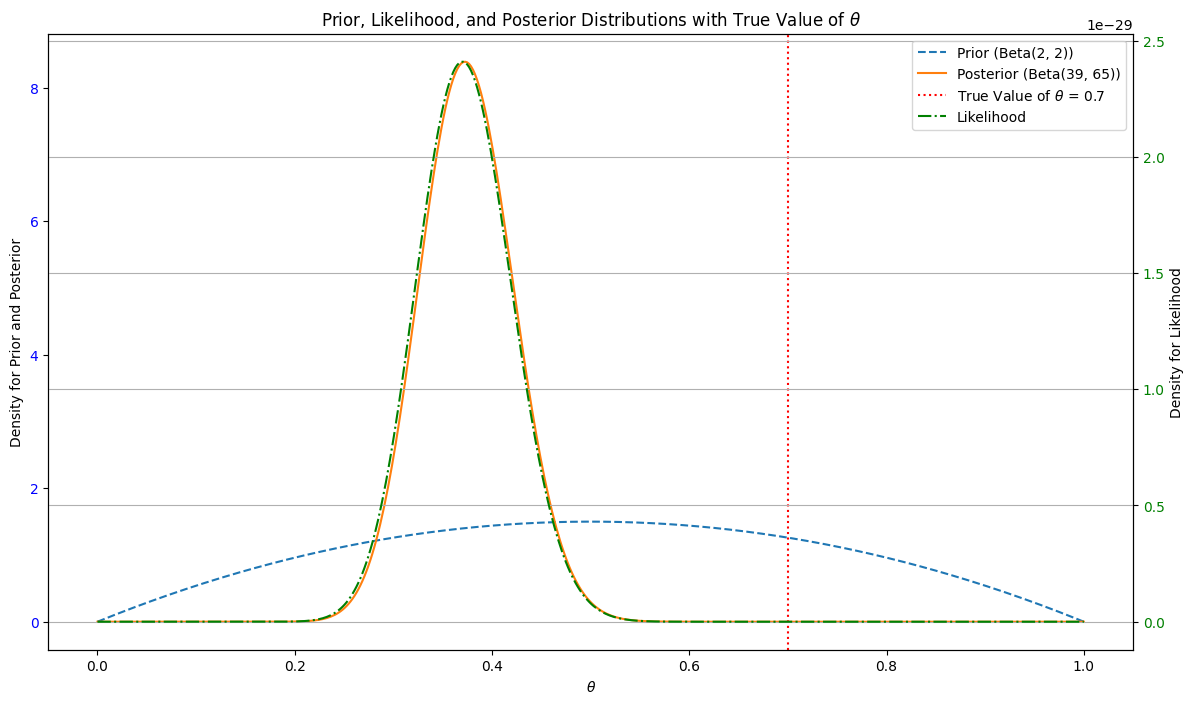

In [ ]:
# Re-importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Re-defining functions and parameters
def bernoulli_likelihood(theta, k, N):
    return (theta ** k) * ((1 - theta) ** (N - k))

def update_beta_params(alpha, beta, k, N):
    return alpha + k, beta + N - k

# Re-defining the parameters and calculations
N = 100
k = 37
alpha_prior = 2
beta_prior = 2
alpha_posterior, beta_posterior = update_beta_params(alpha_prior, beta_prior, k, N)
theta_values = np.linspace(0, 1, 500)
prior_distribution = beta.pdf(theta_values, alpha_prior, beta_prior)
likelihood_distribution = bernoulli_likelihood(theta_values, k, N)
posterior_distribution = beta.pdf(theta_values, alpha_posterior, beta_posterior)
theta_true = 0.7

# Re-running the plotting code with twin y-axes for better visibility of the likelihood function
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot Prior and Posterior on the first y-axis
ax1.plot(theta_values, prior_distribution, label='Prior (Beta(2, 2))', linestyle='--')
ax1.plot(theta_values, posterior_distribution, label=f'Posterior (Beta({alpha_posterior}, {beta_posterior}))')
ax1.axvline(x=theta_true, color='r', linestyle=':', label=f"True Value of $\\theta$ = {theta_true}")

# Make the y-axis label and tick labels match the line color.
ax1.set_xlabel("$\\theta$")
ax1.set_ylabel("Density for Prior and Posterior")
for tl in ax1.get_yticklabels():
    tl.set_color('b')

# Set up the second y-axis
ax2 = ax1.twinx()
ax2.plot(theta_values, likelihood_distribution, label='Likelihood', linestyle='-.', color='g')
ax2.set_ylabel('Density for Likelihood')
for tl in ax2.get_yticklabels():
    tl.set_color('g')

# Add a legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc=0)

# Add grid and title
plt.grid(True)
plt.title("Prior, Likelihood, and Posterior Distributions with True Value of $\\theta$")

plt.show()


### Posterior Mode (MAP Estimate)

The Maximum A Posteriori (MAP) estimate is the mode of the posterior distribution, i.e., the value of $\theta$ that maximizes the posterior distribution $p(\theta | D)$. The MAP estimate serves as a single-point estimate of $\theta$, much like the frequentist point estimate, but it incorporates prior information.

Given that the posterior distribution in our example is a Beta distribution $\text{Beta}(\theta | \alpha + N_1, \beta + N_0)$, the MAP estimate $\theta_{\text{MAP}}$ can be calculated as:

$$
\theta_{\text{MAP}} = \frac{\alpha + N_1 - 1}{\alpha + N_1 - 1 + \beta + N_0 - 1}
$$

Note that the MAP estimate reduces to the frequentist estimate of $\theta$ when $\alpha = 1$ and $\beta = 1$, which corresponds to an uninformative (uniform) prior.

###  Posterior Mean Estimate

The posterior mean is another point estimate of $\theta$ that takes into account both the likelihood and the prior distribution. It is computed as the mean (expected value) of the posterior distribution $p(\theta | D)$.


In the context of our problem, where the posterior is $\text{Beta}(\alpha + N_1, \beta + N_0)$, the posterior mean $ \theta_{\text{Posterior Mean}}$ can be calculated as:

$$
\theta_{\text{Posterior Mean}} = \frac{\alpha + N_1}{\alpha + \beta + N}
$$

The posterior mean is often used when we want a point estimate of $\theta$ that minimizes the expected squared error. Unlike the MAP, the posterior mean is not a mode of the distribution, but rather a measure of central tendency.


### Posterior Mean

The posterior mean is the expected value of $\theta$ given the data $D$, and it is calculated as the mean of the posterior distribution $p(\theta | D)$. The expected value $E[\theta|D]$ of a random variable $\theta$ with probability density function $p(\theta|D)$ is given by:

$$
E[\theta|D] = \int \theta p(\theta|D) d\theta
$$

In the case of a Beta distribution $\text{Beta}(\alpha, \beta)$, the PDF is:

$$
p(\theta|D) = \frac{\theta^{\alpha + N_1 - 1}(1 - \theta)^{\beta + N_0 - 1}}{B(\alpha + N_1, \beta + N_0)}
$$

Here, $B(\alpha, \beta)$ is the Beta function, defined as:

$$
B(\alpha, \beta) = \int_0^1 t^{\alpha - 1}(1 - t)^{\beta - 1} dt
$$

The expected value$E[\theta]$ is therefore:

$$
E[\theta|D] = \int_0^1 \theta \left[\frac{\theta^{\alpha + N_1 - 1}(1 - \theta)^{\beta + N_0 - 1}}{B(\alpha + N_1, \beta + N_0)}\right ] d\theta
$$

$$
E[\theta|D] = \frac{1}{B(\alpha + N_1, \beta + N_0)} \int_0^1 \theta^{\alpha + N_1}(1 - \theta)^{\beta + N_0 - 1} d\theta
$$

This integral is actually another Beta function $B(\alpha+N_1 + 1, \beta + N_0)$. Therefore, we have:

$$
E[\theta|D] = \frac{B(\alpha + N_1 + 1, \beta + N_0)}{B(\alpha + N_1, \beta + N_0)}
$$

$$
E[\theta|D] = \frac{\alpha + N_1}{\alpha + N_1+ \beta + N_0}
$$

#### Gamma Function Properties Used in the Derivation

The Gamma function, denoted as $ \Gamma(x)$, is defined as:

$$
\Gamma(x) = \int_0^\infty t^{x-1} e^{-t} dt
$$

The properties of the Gamma function that are relevant for simplifying the expression for the mean of a Beta distribution are:

1. **Factorial Relationship**: For a positive integer $n$, the Gamma function is related to the factorial of $(n-1)$:

$$
\Gamma(n) = (n - 1)!
$$

2. **Recursive Property**: The Gamma function satisfies the recursive property:

$$
\Gamma(x + 1) = x \Gamma(x)
$$

3. **Relationship with Beta Function**: The Beta function $B(\alpha, \beta)$ is related to the Gamma function as follows:

$$
B(\alpha, \beta) = \frac{\Gamma(\alpha) \Gamma(\beta)}{\Gamma(\alpha + \beta)}
$$

By using the third property, we can express the Beta function in terms of the Gamma function. This allows us to simplify the expression for the mean of the Beta distribution ($E[\theta|D]$):

$$
E[\theta|D] = \frac{\Gamma(\alpha + N_1 + 1) \Gamma(\beta + N_0)}{\Gamma(\alpha + N_1 + \beta + N_0 + 1)} \times \frac{\Gamma(\alpha + N_1 + \beta + N_0)}{\Gamma(\alpha + N_1) \Gamma(\beta + N_0)}
$$


### Posterior variance

The variance of the beta posterior is given by:

$$
Var(\theta|D)=\frac{(\alpha + N_1) (\beta + N_0)}{(\alpha + N_1 + \beta + N_0)^2(\alpha + N1 + \beta + N_0 +1)}
$$
If $N\gg\alpha,\beta$:

$$
Var(\theta|D)\approx \frac{\theta_{\text{MLE}}(1-\theta_{\text{MLe}})}{N}
$$

###  Posterior Predictive Distribution

The posterior predictive distribution is used to model the distribution of future observations, given both a statistical model and the observed data. In Bayesian statistics, it provides a way to update our predictions after observing new data, taking into account both the likelihood and the posterior distribution of the parameters.

#### Definition

The posterior predictive distribution $p(y_{\text{new}} | D)$ for a new data point $y_{\text{new}}$ given observed data $D$ is defined as:

$$
p(y_{\text{new}} | D) = \int p(y_{\text{new}} | \theta) p(\theta | D) d\theta
$$

Here, $p(y_{\text{new}} | \theta)$ is the likelihood of the new data point given the parameter $\theta$, and $p(\theta | D)$ is the posterior distribution of $\theta$ given the observed data $D$.

#### For the Coin Toss Example

In our coin toss example, if $\theta$ follows a Beta distribution with parameters $\alpha + N_1$ and $\beta + N_0$ after observing $k$ heads in $N$ trials, then the posterior predictive distribution for a new coin toss coming up heads is:

$$
p(y_{\text{new}} = 1 | D) = \int_0^1 \text{Bernoulli}(y_{\text{new}} = 1 | \theta) \times \text{Beta}(\theta | \alpha+N_1, \beta+N_0) d\theta
$$

After performing the integral, you get:

$$
p(y_{\text{new}} = 1 | D) = \frac{\alpha+N_1}{\alpha+N_1 + \beta+N_0}
$$

This is an example of how the Bayesian framework allows for straightforward updating of predictions based on new data.

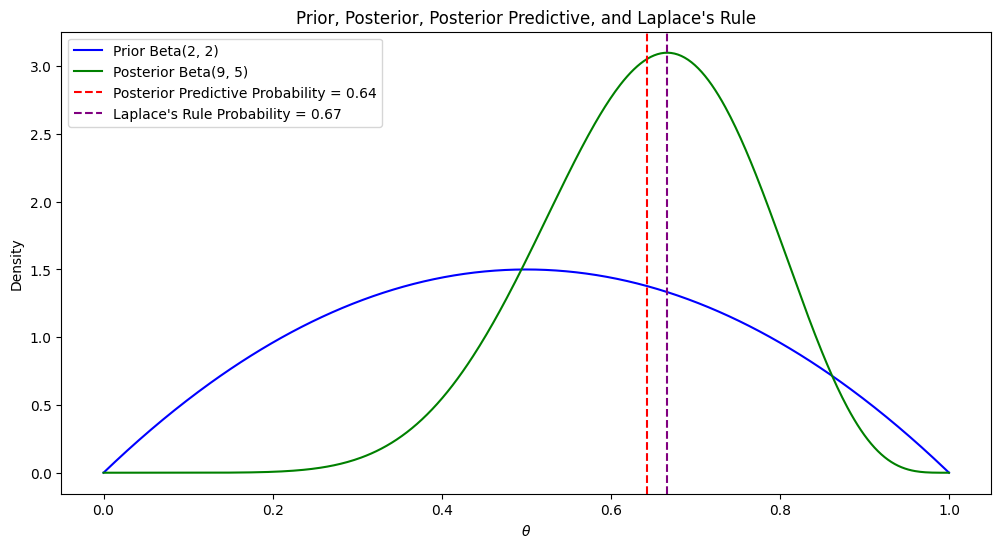

0.6666666666666666

In [ ]:
# Re-importing the necessary libraries and redefining variables
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Define the parameters for the prior distribution
alpha_prior = 2
beta_prior = 2

# Simulate observed data: 7 heads out of 10 coin tosses
k = 7
N = 10

# Update the parameters for the posterior distribution
alpha_posterior = alpha_prior + k
beta_posterior = beta_prior + N - k

# Calculate the posterior predictive probability for y_new = 1 (i.e., a new coin toss coming up heads)
posterior_predictive_prob = alpha_posterior / (alpha_posterior + beta_posterior)

# Calculate the probability using Laplace's rule of succession
laplace_prob = (k + 1) / (N + 2)

# Generate some points for plotting
theta_values = np.linspace(0, 1, 500)
prior_pdf = beta.pdf(theta_values, alpha_prior, beta_prior)
posterior_pdf = beta.pdf(theta_values, alpha_posterior, beta_posterior)

# Plot the prior, posterior, posterior predictive probability, and Laplace's rule probability
plt.figure(figsize=(12, 6))
plt.plot(theta_values, prior_pdf, label=f'Prior Beta({alpha_prior}, {beta_prior})', color='blue')
plt.plot(theta_values, posterior_pdf, label=f'Posterior Beta({alpha_posterior}, {beta_posterior})', color='green')
plt.axvline(x=posterior_predictive_prob, color='red', linestyle='--', label=f'Posterior Predictive Probability = {posterior_predictive_prob:.2f}')
plt.axvline(x=laplace_prob, color='purple', linestyle='--', label=f'Laplace\'s Rule Probability = {laplace_prob:.2f}')
plt.title('Prior, Posterior, Posterior Predictive, and Laplace\'s Rule')
plt.xlabel('$\\theta$')
plt.ylabel('Density')
plt.legend()
plt.show()

# Output the Laplace's rule probability for y_new = 1
laplace_prob


### Marginal likelihood

The marginalZlikelihood or evidence for a model $M$ is defined as:

$$
p(D|M)=\int p(D|\theta, M) p(\theta|M) d\theta
$$

In general, computing the marginal likelihood can be hard. However, in the case of the beta- Bernoulli model, the marginal likelihood is proportional to the ratio of the posterior normalizer to the prior normalizer:

$$
p(D|M)=\frac{B(\alpha + N_1, \beta + N_0)}{B(\alpha, \beta)}
$$

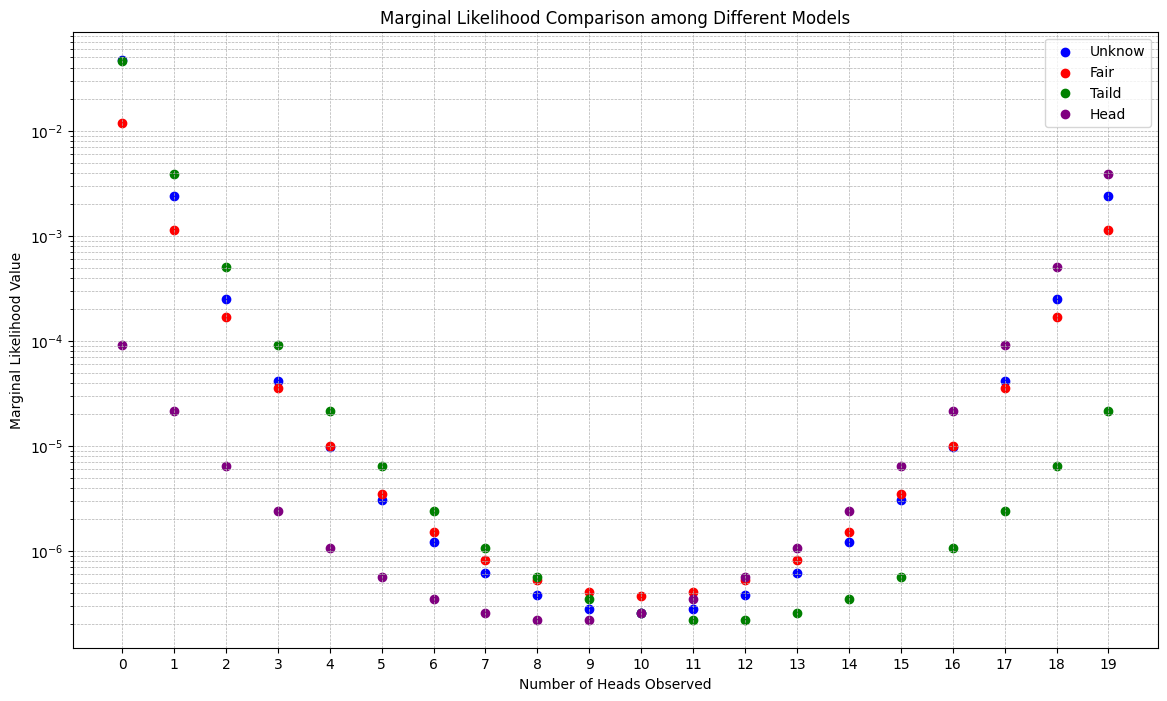

In [ ]:
# @title
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import beta as beta_function

# Calculate the likelihood under M0 and marginal likelihood under M1 for each x-value
# In this example, let's assume each x-value represents a different number of "heads" observed in 10 coin tosses

N = 20

model_0 = {"alpha_prior": 1, "beta_prior":1} # Uniform
model_1 = {"alpha_prior": 2, "beta_prior":2} # Fair coint
model_2 = {"alpha_prior": 2, "beta_prior":5} # More tails
model_3 = {"alpha_prior": 5, "beta_prior":2} # More heads

models_list = [model_0, model_1, model_2, model_3]

# Each row represents a model
matrix_models_marginal_likelihood = np.zeros((4, N))

def marginal_likelihood(N:int, N1:int, alpha_prior:float, beta_prior:float) -> float:

  return beta_function(N1 + alpha_prior, N - N1 + beta_prior) / beta_function(alpha_prior, beta_prior)

for row, model in enumerate(models_list):
  for N1 in range(N): # Row major order
    matrix_models_marginal_likelihood[row,N1] = marginal_likelihood(N, N1, model["alpha_prior"], model["beta_prior"])

# Create scatter plots for the calculated marginal likelihoods of different models

plt.figure(figsize=(14, 8))

colors = ['blue', 'red', 'green', 'purple']
labels = ['Unknow', 'Fair', 'Taild', 'Head']

for row, (color, label) in enumerate(zip(colors, labels)):
    plt.scatter(range(N), matrix_models_marginal_likelihood[row], color=color, label=label)

plt.xlabel('Number of Heads Observed')
plt.ylabel('Marginal Likelihood Value')
plt.title('Marginal Likelihood Comparison among Different Models')
plt.xticks(range(N))
plt.yscale("log")
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

